In [1]:
# !pip install neuralprophet

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [3]:
df = pd.read_csv('weather_all.csv')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
0,Polonnaruwa,1/1/2009,28.2,19.9,24.6,29.8,19.9,25.4,19.1,72.47,5.3,57.0,1011.4,24.6,18.5,0.11
1,Polonnaruwa,1/2/2009,28.1,23.4,26.0,30.2,23.4,26.7,20.5,72.23,5.0,39.0,1012.6,31.3,20.0,0.14
2,Polonnaruwa,1/3/2009,28.2,21.7,25.6,29.5,21.7,26.6,19.5,69.88,4.7,36.3,1012.2,19.9,20.0,0.20
3,Polonnaruwa,1/4/2009,28.0,22.0,25.6,30.1,22.0,27.0,20.7,74.68,7.2,112.3,1011.7,37.2,20.0,0.25
4,Polonnaruwa,1/5/2009,28.6,22.6,25.6,30.9,22.6,26.8,21.2,77.25,5.4,97.3,1010.3,41.8,18.9,0.31


In [4]:
df.name.unique()

array(['Polonnaruwa', 'Jaffna', 'Matara', 'Ratnapura', "Mahaweli'h'",
       'Ampara', 'Nuwaraeliya', 'Puttalam', 'Anuradhapura', 'Batticaloa',
       'Matale', 'Moneragala', 'Kandy', 'Hambantota', 'Gampaha',
       'Kurunegala', 'colombo', 'Vavuniya', 'Trincomalee', 'Mullativu',
       'Mannar', 'Kalutara', 'Badulla', 'Kilinochchi', 'Kegalle', 'Galle'],
      dtype=object)

In [5]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'moonphase'],
      dtype='object')

In [6]:
Polonnaruwa = df[df['name']=='Polonnaruwa']
Polonnaruwa['datetime'] = pd.to_datetime(Polonnaruwa['datetime'])
Polonnaruwa.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\ayodh\AppData\Local\Temp/ipykernel_8060/42828581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Polonnaruwa['datetime'] = pd.to_datetime(Polonnaruwa['datetime'])



,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
0,Polonnaruwa,2009-01-01,28.2,19.9,24.6,29.8,19.9,25.4,19.1,72.47,5.3,57.0,1011.4,24.6,18.5,0.11
1,Polonnaruwa,2009-01-02,28.1,23.4,26.0,30.2,23.4,26.7,20.5,72.23,5.0,39.0,1012.6,31.3,20.0,0.14
2,Polonnaruwa,2009-01-03,28.2,21.7,25.6,29.5,21.7,26.6,19.5,69.88,4.7,36.3,1012.2,19.9,20.0,0.20
3,Polonnaruwa,2009-01-04,28.0,22.0,25.6,30.1,22.0,27.0,20.7,74.68,7.2,112.3,1011.7,37.2,20.0,0.25
4,Polonnaruwa,2009-01-05,28.6,22.6,25.6,30.9,22.6,26.8,21.2,77.25,5.4,97.3,1010.3,41.8,18.9,0.31


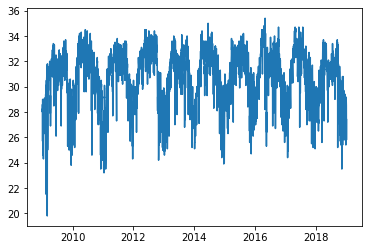

In [7]:
plt.plot(Polonnaruwa['datetime'], Polonnaruwa['tempmax'])
plt.show()

WARNING - (py.warnings._showwarnmsg) - C:\Users\ayodh\AppData\Local\Temp/ipykernel_8060/2085099022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Polonnaruwa['Year'] = Polonnaruwa['datetime'].apply(lambda x: x.year)



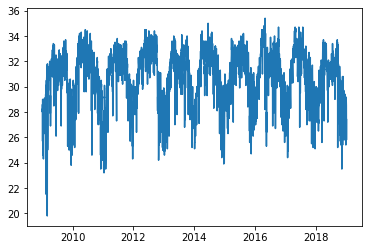

In [8]:
Polonnaruwa['Year'] = Polonnaruwa['datetime'].apply(lambda x: x.year)
Polonnaruwa = Polonnaruwa[Polonnaruwa['Year']<=2019]
plt.plot(Polonnaruwa['datetime'], Polonnaruwa['tempmax'])
plt.show()

In [9]:
data = Polonnaruwa[['datetime', 'tempmax']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\ayodh\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
0,2009-01-01,28.2
1,2009-01-02,28.1
2,2009-01-03,28.2
3,2009-01-04,28.0
4,2009-01-05,28.6


In [10]:
m = NeuralProphet()

In [11]:
model = m.fit(data, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.406% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 135


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.50E-01, min: 1.96E+00


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.50E-01, min: 1.96E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.31E-01
Epoch[135/135]: 100%|██████████| 135/135 [00:24<00:00,  5.57it/s, SmoothL1Loss=0.0049, MAE=1.01, RMSE=1.34, RegLoss=0] 


In [12]:
future = m.make_future_dataframe(data, periods=1200)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.406% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2019-01-02,None,27.193754,NaN,30.064125,-2.821433,-0.048939
1,2019-01-03,None,27.321594,NaN,30.062473,-2.820583,0.079704
2,2019-01-04,None,27.267420,NaN,30.060822,-2.817548,0.024146
3,2019-01-05,None,27.282410,NaN,30.059170,-2.812278,0.035519
4,2019-01-06,None,27.295904,NaN,30.057518,-2.804739,0.043126


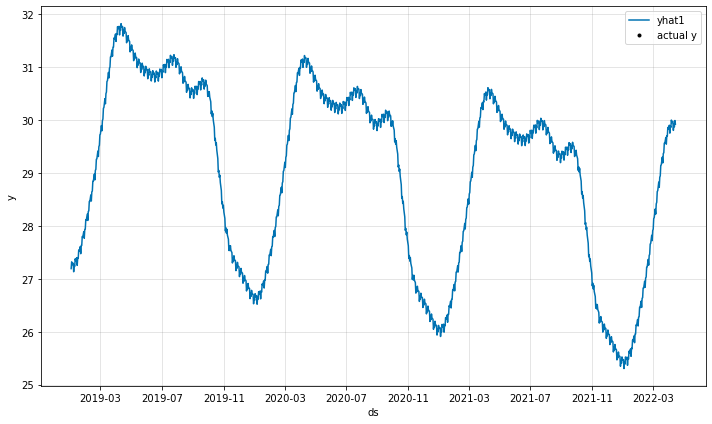

In [13]:
plot1 = m.plot(forecast)

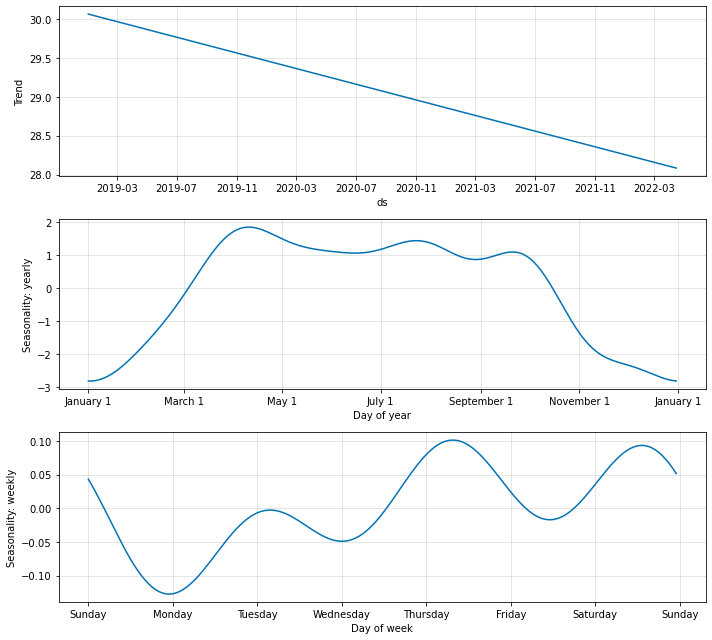

In [14]:
plt2 = m.plot_components(forecast)

In [15]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [16]:
del m

In [17]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [18]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.406% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2019-01-02,None,27.193754,NaN,30.064125,-2.821433,-0.048939
1,2019-01-03,None,27.321594,NaN,30.062473,-2.820583,0.079704
2,2019-01-04,None,27.267420,NaN,30.060822,-2.817548,0.024146
3,2019-01-05,None,27.282410,NaN,30.059170,-2.812278,0.035519
4,2019-01-06,None,27.295904,NaN,30.057518,-2.804739,0.043126


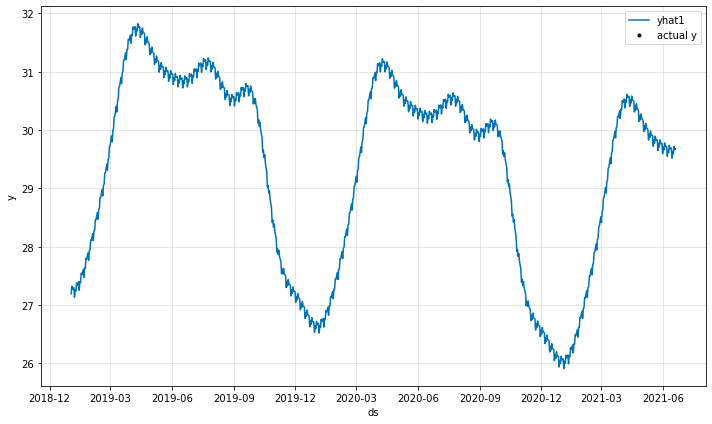

In [19]:
plot1 = m.plot(forecast)